<a href="https://colab.research.google.com/github/LeeJaeEun0/st230112/blob/main/230112_ch05_DL_06_%EC%84%A0%EC%9D%B8%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()
# kaggle > Profile 이미지 > Account > Account > API > Create New API Token
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
# late submission
# https://www.kaggle.com/competitions/aerial-cactus-identification
!kaggle competitions download -c aerial-cactus-identification # kaggle.json? -> 403, late submission -> 401
# aerial-cactus-identification.zip: Skipping, found more recently modified local copy (use --force to force download)

Saving kaggle.json to kaggle.json
aerial-cactus-identification.zip: Skipping, found more recently modified local copy (use --force to force download)


압축풀기

In [ ]:
!ls
!unzip aerial-cactus-identification.zip
!ls
'''
aerial-cactus-identification.zip  sample_submission.csv  train.csv
sample_data			  test.zip		 train.zip
'''

aerial-cactus-identification.zip  sample_data
Archive:  aerial-cactus-identification.zip
  inflating: sample_submission.csv   
  inflating: test.zip                
  inflating: train.csv               
  inflating: train.zip               
aerial-cactus-identification.zip  sample_submission.csv  train.csv
sample_data			  test.zip		 train.zip


'\naerial-cactus-identification.zip  sample_submission.csv  train.csv\nsample_data\t\t\t  test.zip\t\t train.zip\n'

## 탐색적 데이터 분석 (EDA)

In [ ]:
import pandas as pd

# CSV 데이터
labels = pd.read_csv('train.csv')
submission = pd.read_csv('sample_submission.csv')

In [ ]:
labels.head() # id, has_cactus
# 0 : 선인장이 없고, 1이면 있다
# id = 파일명(jpg)

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [ ]:
submission.head()

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,0.5
1,0017242f54ececa4512b4d7937d1e21e.jpg,0.5
2,001ee6d8564003107853118ab87df407.jpg,0.5
3,002e175c3c1e060769475f52182583d0.jpg,0.5
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,0.5


### 데이터 시각화

#### 타깃값 분포

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

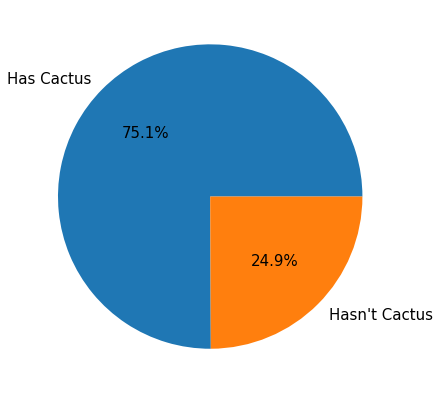

In [ ]:
# 선인장 보유 여부 시각화 (타깃값, 정답값)
mpl.rc('font', size=15) # 폰트 사이즈 15
plt.figure(figsize=(7, 7)) # 글
label = ['Has Cactus', 'Hasn\'t Cactus']
plt.pie(labels['has_cactus'].value_counts(), labels=label, autopct='%.1f%%')
plt.show() # (0): 1 : (1) :3

#### 이미지 출력

In [ ]:
from zipfile import ZipFile # 압축을 해제할 수 있는 라이브러리

# 훈련 데이터 압축 풀기
with ZipFile('train.zip') as zipper:
    zipper.extractall()

# 데스트 데이터 압축 풀기
with ZipFile('test.zip') as zipper:
    zipper.extractall()

In [ ]:
!ls
!ls train

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
34bb329154e587af9d94d6f534736550.jpg  b562d502ebe643a3225702fa5d959e42.jpg
34be1406cd3695e92fe7b1b83beb8d7e.jpg  b563db810a04ea29e98666440f6eefc0.jpg
34c6b3b82d2134436ce49e62dcec1753.jpg  b56ebdd452de4737c905008ade73c9b1.jpg
34c91231a8d88553d8a5c68b92be617c.jpg  b5759a7a465f9669bfaca416067fbe4a.jpg
34c9ad50a90976c6f95b020ec4d80944.jpg  b578642acb038eb2cf6f4c4967261809.jpg
34d57402422a8e6ef4b56544ad2fd667.jpg  b57e5b6adc7ceb7895c1df956109463d.jpg
34dd5bcf8cbcedaf54e9c2e9c191817c.jpg  b57fdf31347f2c18d2748985c6f5a747.jpg
34e4d3b893b451eaf82a89b3dc2915c8.jpg  b583ee8f7d13be8df2b3ed4a756dac70.jpg
34e5b665b4a040c24212d826a0b3545a.jpg  b58717e6aaa8fb438344c41ddae28ee4.jpg
34e8e45bc4ce08cebd25867d8e475cd1.jpg  b58d8074171dbb99a4b67ecfd17577f9.jpg
34ef28aab0f65b1976a081470ef37f0e.jpg  b595cf55acc1cca52fb5420bc4187b47.jpg
34efadc8a42378f61eef5161ee4817ac.jpg  b59824407ec18515e621f3814de31447.jpg
34f31080c56a12694c180c530a6d7d82.jpg  b59bf003afaa24df85a2a0e1bf

In [ ]:
import os

num_train= len(os.listdir('train/'))
num_test= len(os.listdir('test/'))

print(f'훈련 데이터의 개수 : {num_train}')
print(f'테스트 데이터의 개수 : {num_test}')

훈련 데이터의 개수 : 17500
테스트 데이터의 개수 : 4000


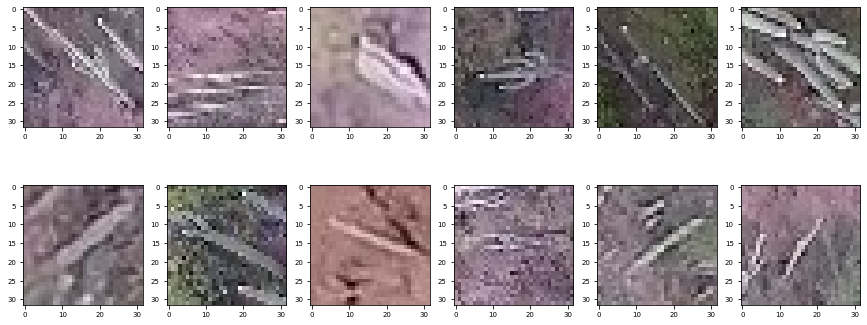

In [ ]:
import cv2 # OpenCV 라이브러리
import matplotlib.gridspec as gridspec # 격자 형태로 나타내기

mpl.rc('font', size=7)
plt.figure(figsize=(15, 6)) # figure 크기 설정
grid = gridspec.GridSpec(2, 6) # subplot -> (2행 6열)

# 선인장을 포함하는 이미지 불러오기 (12장)
last_has_cactus_img_name = labels[labels['has_cactus']==1]['id'][-12:]

# 이미지 출력
for idx, img_name in enumerate(last_has_cactus_img_name):
    img_path = 'train/' + img_name # 이미지 파일 경로
    image = cv2.imread(img_path) # 이미지 파일 읽기
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # 이미지 색상 보정
    ax = plt.subplot(grid[idx]) # 자동으로 그리드 위치를 잡아줌
    ax.imshow(image)

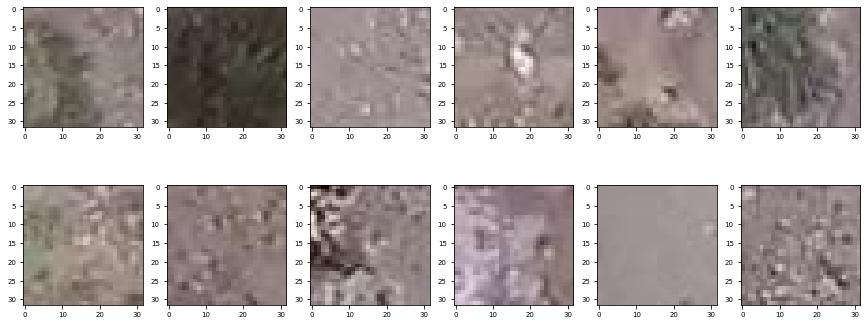

In [ ]:
import cv2 # OpenCV 라이브러리
import matplotlib.gridspec as gridspec # 격자 형태로 나타내기

mpl.rc('font', size=7)
plt.figure(figsize=(15, 6)) # figure 크기 설정
grid = gridspec.GridSpec(2, 6) # subplot -> (2행 6열)

# 선인장을 포함하지않는 이미지 불러오기 (12장)
last_has_cactus_img_name = labels[labels['has_cactus']==0]['id'][-12:]

# 이미지 출력
for idx, img_name in enumerate(last_has_cactus_img_name):
    img_path = 'train/' + img_name # 이미지 파일 경로
    image = cv2.imread(img_path) # 이미지 파일 읽기
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # 이미지 색상 보정
    ax = plt.subplot(grid[idx]) # 자동으로 그리드 위치를 잡아줌
    ax.imshow(image) # 항공에서 찍은 선인장 사진

In [ ]:
image.shape

(32, 32, 3)

## 베이스라인 모델

CNN (합성곱 신경망 모델)
* 베이스라인 모델 : 얕은 CNN
  * 신경망 구조 : 합성곱 x 2, 풀링, 평탄화, 전결합
  * 옵티마이저 : SGD

### 환경설정

In [ ]:
import torch
import random
import numpy as np
import os

# 시드값
seed = 50
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed) # 파이썬 난수 생성기 시드 고정
np.random.seed(seed) # 넘파이 난수 생성기 시드 고정
torch.manual_seed(seed) # 파이토치 난수 생성기 시드 고정 (cpu)
torch.cuda.manual_seed(seed) # 파이토치 난수 생성기 시드 고정 (gpu)
torch.cuda.manual_seed_all(seed) # 파이토치 난수 생성기 시드 고정 (멀티 gpu)
torch.backends.cudnn.deterministic = True # 확정적 연산 사용
torch.backends.cudnn.benchmark = False # 벤치마크 기능 해제
torch.backends.cudnn.enabled = False # cudnn 사용 해제

In [ ]:
# GPU 장비 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
device

device(type='cuda')

### 데이터 준비

In [ ]:
# 훈련 데이터, 검증 데이터 분리
from sklearn.model_selection import train_test_split

train, valid = train_test_split(labels,
                                test_size=0.1,
                                stratify=labels['has_cactus'], # 훈련셋/검증셋을 실제 0,1 분류 값 비율에 맞춰서 분리
                                random_state=50)

In [ ]:
print(f'훈련 데이터 개수 : {len(train)}')
print(f'검증 데이터 개수 : {len(valid)}')

훈련 데이터 개수 : 15750
검증 데이터 개수 : 1750


#### 데이터셋 클래스
* torchvision.datasets.FashionMNIST

In [ ]:
from torch.utils.data import Dataset # 데이터셋 생성을 위한 클래스
import cv2 # 이미지 불러오는 라이브러리 (cv2)

# 데이터셋 클래스 -> 데이터를 받아와서 -> 변환기를 거쳐서 -> 데이터 로더
class ImageDataset(Dataset):
    # 초기화 메서드, 생성자 메서드
    def __init__(self,
                 df, # 라벨과 이미지 파일 주소가 들어 있는 csv
                 img_dir = './', # 이미지 경로 (기본, 기준 경로)
                 transform = None,
                 ):
        super().__init__() # 상속받은 Dataset의 생성자를 호출
        # 전달받은 인수(매개변수)들을 저장
        self.df = df
        self.img_dir = img_dir
        self.transform = transform
    
    # 1. __len__ 2. __getitem__
    # __len__ -> len(...) -> 결과값 (길이값)
    # getitem은 인덱싱([]) 할 때 주어진 인덱스[0~]에 맞는 데이터를 반환

    # 데이터셋 크기 반환 메소드
    def __len__(self):
        return len(self.df) # 입력받은 df의 길이 반환
    
    # 인덱스(idx)에 해당하는 데이터 반환 메소드
    def __getitem__(self, idx):
        img_id = self.df.iloc[idx, 0] # 이미지 ID (이미지 파일 이름)
        img_path = self.img_dir + img_id # 이미지 파일의 전체 경로
        image = cv2.imread(img_path) # 이미지 파일 읽기
        # BGR -> RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # 이미지 색상 보정 (cv2 -> plt)
        # 정답값, 타깃값 label
        label = self.df.iloc[idx, 1] # 이미지 레이블(타깃값, 정답값) -> 선인장 여부

        if self.transform is not None:
            image = self.transform(image) # 변환기(transform)가 있다면 이미지 변환
        
        return image, label # 이미지, 라벨 -> 데이터셋

#### 데이터셋 생성

In [ ]:
from torchvision import transforms # 이미지 변환

transform = transforms.ToTensor()

In [ ]:
dataset_train = ImageDataset(
    df=train, # 이미지 파일 이름, 정답값
    img_dir='train/',
    transform=transform
)
dataset_valid = ImageDataset(
    df=valid, # 이미지 파일 이름, 정답값
    img_dir='train/', # 검증셋 -> 검증을 위해 훈련셋에서 부분적으로 빼온 값
    transform=transform
)

#### 데이터 로더 생성
  * 배치 사이즈를 지정하면 그만큼 떼서 epoch마다처리

In [ ]:
from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)


from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)ㅍfrom torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)



loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)ㅍㅍㅍfrom torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super().__init__() # nn.Module 상속 받은 내용 초기화
        # layer 신경망 정의 (합성곱, 배치 정규화, 최대 풀링)
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=2),
            nn.BatchNorm2d(32),
            nn.LeakyReLU() # 0.01만큼 음수도 반영
        )import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super().__init__() # nn.Module 상속 받은 내용 초기화
        # layer 신경망 정의 (합성곱, 배치 정규화, 최대 풀링)
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=2),
            nn.BatchNorm2d(32),
            nn.LeakyReLU() # 0.01만큼 음수도 반영
        )import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super().__init__() # nn.Module 상속 받은 내용 초기화
        # layer 신경망 정의 (합성곱, 배치 정규화, 최대 풀링)
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=2),
            nn.BatchNorm2d(32),
            nn.LeakyReLU() # 0.01만큼 음수도 반영
        )import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super().__init__() # nn.Module 상속 받은 내용 초기화
        # layer 신경망 정의 (합성곱, 배치 정규화, 최대 풀링)
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=2),
            nn.BatchNorm2d(32),
            nn.LeakyReLU() # 0.01만큼 음수도 반영
        )import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super().__init__() # nn.Module 상속 받은 내용 초기화
        # layer 신경망 정의 (합성곱, 배치 정규화, 최대 풀링)
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=2),
            nn.BatchNorm2d(32),
            nn.LeakyReLU() # 0.01만큼 음수도 반영
        )import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super().__init__() # nn.Module 상속 받은 내용 초기화
        # layer 신경망 정의 (합성곱, 배치 정규화, 최대 풀링)
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=2),
            nn.BatchNorm2d(32),
            nn.LeakyReLU() # 0.01만큼 음수도 반영





        )toldfkjklsdfdf;sdfkmㄴㅇ런ㅇㄹdfksdflkjsd;lkfj;asfafsd

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super().__init__() # 상속받은 nn.Module을 초기화

        # 첫번째 합성곱 계층
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32,
                               kernel_size=3, padding=2)
        # 출력 데이터 크기 = (입력 데이터 크기 + 2 * 패딩 크기 - 필터 크기) / 스트라이드 + 1
        # (32 + 2 * 2 - 3) / 1 + 1 = 33 + 1 + 34
        # (3, 32, 32) -> (32, 34, 34)

        # 두번째 합성곱 계층
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64,
                               kernel_size=3, padding=2)
      
        # 최대 풀링 (max_pooling)
        self.max_pool = nn.MaxPool2d(kernel_size=2) # 커널 사이즈만큼 나눠주기

        # 평균 풀링 (avg_pooling)
        self.avg_pool = nn.AvgPool2d(kernel_size=2)

        # 전결합(fully connected = fc)
        self.fc = nn.Linear(in_features=64 * 4 * 4, out_features=2)
    
    # 순전파 출력 정의
    def forward(self, x):
        # (1) self.conv1(x) -> 특징 맵
        # (32 + 2 * 2 - 3) / 1 + 1 = 33 + 1 = 34
        # (3, 32, 32) -> (32, 34, 34)
        # (2) max_pool (커널 사이즈의 가장 큰 값을 뽑아줌)
        # (3, 32, 32) -> (32, 17, 17)
        x = self.max_pool(F.relu(self.conv1(x)))
        # (1) self.conv2(x) -> 특징 맵
        # (17 + 2 * 2 - 3) / 1 + 1 = 18 + 1 = 19
        # (32, 17, 17) -> (64, 19, 19)
        # (2) max_pool (커널 사이즈의 가장 큰 값을 뽑아줌)
        # (64, 19, 19) -> (64, 9, 9) # 풀링할 때 소수점 나오면 버려줌 (기본값)
        x = self.max_pool(F.relu(self.conv2(x)))
        # 평균풀링
        x = self.avg_pool(x)
        # (64, 9, 9) -> (64, 4, 4)
        # 전결합 -> 평탄화 (한 줄로 표시)
        x = x.view(-1, 64 * 4 * 4) # 평탄화 (1024)
        x = self.fc(x) # 1024 -> 0 또는 1로
        return x

In [ ]:
model = Model().to(device)

In [ ]:
print(model)

Model(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (max_pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (avg_pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (fc): Linear(in_features=1024, out_features=2, bias=True)
)


In [ ]:
import torchsummary

torchsummary.summary(model, (3, 32, 32), 32)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [32, 32, 34, 34]             896
         MaxPool2d-2           [32, 32, 17, 17]               0
            Conv2d-3           [32, 64, 19, 19]          18,496
         MaxPool2d-4             [32, 64, 9, 9]               0
         AvgPool2d-5             [32, 64, 4, 4]               0
            Linear-6                    [32, 2]           2,050
Total params: 21,442
Trainable params: 21,442
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.38
Forward/backward pass size (MB): 18.45
Params size (MB): 0.08
Estimated Total Size (MB): 18.90
----------------------------------------------------------------


### 모델 훈련

In [ ]:
# 손실 함수
criterion = nn.CrossEntropyLoss()
# 옵티마이저 (최적화 함수)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
# len(train) / 32

In [ ]:
import math

math.ceil(len(train) / 32) # 소수점 밑 올림
# 에포크 / 배치 크기 / 반복횟수
# 에포크 - 훈련데이터 전체를 학습시켰을 때 학습 횟수
# 배치 크기 - 나눠서 훈련할 훈련 데이터 사이즈
# 반복 회수 (이터레이션) - 배치 크기만큼 나눠서 훈련했을 때의 1에포크당 훈련 횟수
# 전체 에포크 -> 하이퍼 패러미터
# 배치 사이즈 -> 하이퍼 패러미터
# 반복 횟수 -> 훈련 데이터 사이즈 / 배치 사이즈

493

In [ ]:
len(loader_train)

493

In [ ]:
epochs = 10

for epoch in range(epochs):
    epoch_loss = 0 # 에포크별 손실값 리셋

    # '반복 횟수'만큼 반복
    for images, labels in loader_train:
        # 이미지, 레이블(타깃값) -> 미니 배치
        images = images.to(device)
        labels = labels.to(device)

        # 옵티마이저 내 기울기 초기화
        optimizer.zero_grad()
        # 순전파
        outputs = model(images)
        # 손실함수를 활용해 outputs와 label 손실값(오차값) 계산
        loss = criterion(outputs, labels) # 배치별 loss
        # 현재 배치에서의 손실 추가
        epoch_loss += loss.item() # epoch_loss = epoch_loss + loss.item()

        # 오차 역전파
        loss.backward()
        # 가중치 갱신
        optimizer.step()
    
    # 훈련 데이터 손실값 출력
    print(f'에포크 [{epoch+1}/{epochs}] - 손실값: {epoch_loss/len(loader_train):.4f}')

에포크 [1/10] - 손실값: 0.5237
에포크 [2/10] - 손실값: 0.3449
에포크 [3/10] - 손실값: 0.2424
에포크 [4/10] - 손실값: 0.1964
에포크 [5/10] - 손실값: 0.1773
에포크 [6/10] - 손실값: 0.1618
에포크 [7/10] - 손실값: 0.1528
에포크 [8/10] - 손실값: 0.1421
에포크 [9/10] - 손실값: 0.1363
에포크 [10/10] - 손실값: 0.1295


## 성능 검증

In [ ]:
# ROC AUC -> 이진 분류기의 성능 측정
from sklearn.metrics import roc_auc_score

# 실제값과 예측 확률값을 담을 리스트
true_list = []
preds_list = []

In [ ]:
# 모델 평가
model.eval() # 평가모드

with torch.no_grad(): # 기울기 계산 비활성화
    for images, labels in loader_valid:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images) # 출력값 계산
        preds = torch.softmax(outputs.cpu(), dim=1)[:, 1] # 예측확률 (softmax를 거친 (0~1))
        true = labels.cpu() # 실제값
        # 예측 확률과 실제값을 리스트에 추가
        preds_list.extend(preds)
        # preds_list += preds
        true_list.extend(true)

In [ ]:
# print([(i, v) for i, v in enumerate(zip(true_list, preds_list))])
for i, v in enumerate(zip(true_list, preds_list)):
    print(i, v) # 정답값, 예측값

0 (tensor(1), tensor(0.0289))
1 (tensor(1), tensor(0.5192))
2 (tensor(1), tensor(0.9734))
3 (tensor(0), tensor(0.0235))
4 (tensor(1), tensor(0.4725))
5 (tensor(1), tensor(0.9992))
6 (tensor(1), tensor(0.9965))
7 (tensor(1), tensor(0.9532))
8 (tensor(1), tensor(0.2611))
9 (tensor(1), tensor(0.5101))
10 (tensor(0), tensor(0.0172))
11 (tensor(1), tensor(0.8494))
12 (tensor(1), tensor(1.0000))
13 (tensor(1), tensor(0.6574))
14 (tensor(0), tensor(0.0037))
15 (tensor(1), tensor(0.6154))
16 (tensor(1), tensor(0.1604))
17 (tensor(1), tensor(0.7966))
18 (tensor(1), tensor(0.9944))
19 (tensor(1), tensor(0.8503))
20 (tensor(1), tensor(0.1949))
21 (tensor(1), tensor(0.2300))
22 (tensor(1), tensor(0.9594))
23 (tensor(1), tensor(0.9760))
24 (tensor(1), tensor(0.4172))
25 (tensor(1), tensor(0.9938))
26 (tensor(1), tensor(0.8416))
27 (tensor(0), tensor(0.0057))
28 (tensor(1), tensor(0.5317))
29 (tensor(1), tensor(0.4765))
30 (tensor(1), tensor(0.8609))
31 (tensor(1), tensor(0.9995))
32 (tensor(0), ten

In [ ]:
# 검증 데이터 ROC AUC 점수 계산
roc_auc_score(true_list, preds_list)

0.9852645469398015

## 예측 및 결과 제출

In [ ]:
dataset_test = ImageDataset(df=submission, img_dir='test/', transform=transform)
loader_test = DataLoader(dataset=dataset_test, batch_size=32, shuffle=False)

In [ ]:
# 예측
model.eval() # 평가 모드 

preds = [] # 배치별로 나뉘어져있는 결과(예측) 데이터를 하나로 모아줄 리스트

with torch.no_grad(): # 기울기 업데이트 끄기
    for images, _ in loader_test: # 테스트 데이터가 담긴 데이터 로더를 반복
        # images, labels -> labels 안써주는 이유? 제출용 데이터라 의미없는 값으로 라벨이 가득차 있어서 _
        images = images.to(device) # 학습에 쓰이는 기기로 연결
        outputs = model(images) # 모델 -> 순전파(예측)
        preds_part = torch.softmax(outputs.cpu(), dim=1)[:, 1].tolist()
        # softmax -> (0, 확률 / 1, 확률.) -> 확률값을 softmax -> 1열(1이 될 확률값) -> 리스트화
        preds += preds_part # 리스트를 연결

preds

[0.6211268901824951,
 0.997475802898407,
 0.01241988968104124,
 0.005160689819604158,
 0.310086190700531,
 0.8578262329101562,
 0.9682509899139404,
 0.9703478813171387,
 0.8106710910797119,
 0.0025780138093978167,
 0.5465750694274902,
 0.9897581338882446,
 0.9848751425743103,
 0.33493340015411377,
 0.017478488385677338,
 0.2971137464046478,
 0.980289876461029,
 0.9732315540313721,
 0.9906476140022278,
 0.007670534308999777,
 0.9985525012016296,
 0.0024198994506150484,
 0.9867070317268372,
 0.002688613021746278,
 0.1578502357006073,
 0.017622418701648712,
 0.9452342391014099,
 0.9504151940345764,
 0.8232277035713196,
 0.06700420379638672,
 0.15668126940727234,
 0.818011462688446,
 0.9631714820861816,
 0.9378097653388977,
 0.856120765209198,
 0.01128033921122551,
 0.7507921457290649,
 0.01338769681751728,
 0.06635814160108566,
 0.22330312430858612,
 0.8993426561355591,
 0.7695809602737427,
 0.0021675608586519957,
 0.0016493754228577018,
 0.8454576730728149,
 0.4934048652648926,
 0.029531

In [ ]:
submission.head()

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,0.5
1,0017242f54ececa4512b4d7937d1e21e.jpg,0.5
2,001ee6d8564003107853118ab87df407.jpg,0.5
3,002e175c3c1e060769475f52182583d0.jpg,0.5
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,0.5


In [ ]:
submission['has_cactus'] = preds
submission['has_cactus']

0       0.621127
1       0.997476
2       0.012420
3       0.005161
4       0.310086
          ...   
3995    0.836892
3996    0.997382
3997    0.966315
3998    0.785788
3999    0.138287
Name: has_cactus, Length: 4000, dtype: float64

In [ ]:
submission.to_csv('submission.csv', index=False)

# 성능 개선
* 이미지 변환 -> 데이터 증강
* CNN 모델의 깊이를 늘려줄 것
* 옵티마이저 (SGD -> Adamax)
* 에포크 수 늘리기

In [ ]:
from torchvision import transforms

# 훈련용 데이터 변환기
transform_train = transforms.Compose([
    transforms.ToTensor(),
    transforms.Pad(32, padding_mode='symmetric'), # 원본의 모양을 대칭시켜서 주위에 두름 (사이즈 x 3배)
    transforms.RandomHorizontalFlip(), # 좌우로 뒤집기 (확률적으로, 기본값 = 0.5)
    transforms.RandomVerticalFlip(), # 상하로 뒤집기 (확률적으로, 기본값 = 0.5)
    transforms.RandomRotation(10), # -10 ~ 10도 사이를 무작위로 회전
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)) # 3개 -> RGB 색상 3개 (색상별 평균값, 표준편차 -> 정규화)
])

# 검증 및 테스트용 데이터 변환기
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Pad(32, padding_mode='symmetric'), # 원본의 모양을 대칭시켜서 주위에 두름 (사이즈 x 3배)
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)) # 3개 -> RGB 색상 3개 (색상별 평균값, 표준편차 -> 정규화)
])

# 데이터 증강 -> 과최적화, 데이터 늘림을 통해 '일반화'

In [ ]:
# 데이터셋 & 데이터 로더
dataset_train = ImageDataset(
    df=train, # 이미지 파일 이름, 정답값
    img_dir='train/',
    transform=transform_train
)
dataset_valid = ImageDataset(
    df=valid, # 이미지 파일 이름, 정답값
    img_dir='train/', # 검증셋 -> 검증을 위해 훈련셋에서 부분적으로 빼온 값
    transform=transform_test
)

In [ ]:
from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)

## 모델 생성

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=3, padding=2),
            nn.BatchNorm2d(out_channels), # **
            nn.LeakyReLU(), # ** 0.01만큼 음수도 반영
            nn.MaxPool2d(kernel_size=2)
        )
    def forward(self, x):
        return self.model(x)

In [ ]:
class Model(nn.Module):
    # def _make_layer(self, in_channels, out_channels):
    #     return nn.Sequential(
    #         nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=3, padding=2),
    #         nn.BatchNorm2d(out_channels), # **
    #         nn.LeakyReLU(), # ** 0.01만큼 음수도 반영
    #         nn.MaxPool2d(kernel_size=2)
    #     )
    def __init__(self):
        super().__init__() # nn.Module 상속 받은 내용 초기화
        # layer 신경망 정의 (합성곱, 배치 정규화, 최대 풀링)
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=2),
            nn.BatchNorm2d(32), # **
            nn.LeakyReLU(), # ** 0.01만큼 음수도 반영
            nn.MaxPool2d(kernel_size=2)
        )
        # self.layer1 = BasicBlock(3, 32)
        # self.layer1 = _make_layer(3, 32)
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=2),
            nn.BatchNorm2d(64), # **
            nn.LeakyReLU(), # ** 0.01만큼 음수도 반영
            nn.MaxPool2d(kernel_size=2)
        )
        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=2),
            nn.BatchNorm2d(128), # **
            nn.LeakyReLU(), # ** 0.01만큼 음수도 반영
            nn.MaxPool2d(kernel_size=2)
        )
        self.layer4 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=2),
            nn.BatchNorm2d(256), # **
            nn.LeakyReLU(), # ** 0.01만큼 음수도 반영
            nn.MaxPool2d(kernel_size=2)
        )
        self.layer5 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=2),
            nn.BatchNorm2d(512), # **
            nn.LeakyReLU(), # ** 0.01만큼 음수도 반영
            nn.MaxPool2d(kernel_size=2)
        )
        # 평균 풀링 계층
        self.avg_pool = nn.AvgPool2d(kernel_size=4)
        
        # 전결합 계층
        self.fc1 = nn.Linear(in_features=512 * 1 * 1, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=2)
    
    # 순전파
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = self.avg_pool(x)
        x = x.view(-1, 512 * 1 * 1) # 평탄화 (한 줄 펴기)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

In [ ]:
model = Model().to(device)

In [ ]:
torchsummary.summary(model, (3, 32 * 3, 32 * 3), 32)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [32, 32, 98, 98]             896
       BatchNorm2d-2           [32, 32, 98, 98]              64
         LeakyReLU-3           [32, 32, 98, 98]               0
         MaxPool2d-4           [32, 32, 49, 49]               0
            Conv2d-5           [32, 64, 51, 51]          18,496
       BatchNorm2d-6           [32, 64, 51, 51]             128
         LeakyReLU-7           [32, 64, 51, 51]               0
         MaxPool2d-8           [32, 64, 25, 25]               0
            Conv2d-9          [32, 128, 27, 27]          73,856
      BatchNorm2d-10          [32, 128, 27, 27]             256
        LeakyReLU-11          [32, 128, 27, 27]               0
        MaxPool2d-12          [32, 128, 13, 13]               0
           Conv2d-13          [32, 256, 15, 15]         295,168
      BatchNorm2d-14          [32, 256,

## 모델훈련

In [ ]:
# 손실 함수
criterion = nn.CrossEntropyLoss()
# 옵티마이저
optimizer = torch.optim.Adamax(model.parameters(), lr=0.00006)

In [ ]:
epochs = 70

for epoch in range(epochs):
    epoch_loss = 0 # 에포크별 손실값 리셋

    # '반복 횟수'만큼 반복
    for images, labels in loader_train:
        # 이미지, 레이블(타깃값) -> 미니 배치
        images = images.to(device)
        labels = labels.to(device)

        # 옵티마이저 내 기울기 초기화
        optimizer.zero_grad()
        # 순전파
        outputs = model(images)
        # 손실함수를 활용해 outputs와 label 손실값(오차값) 계산
        loss = criterion(outputs, labels) # 배치별 loss
        # 현재 배치에서의 손실 추가
        epoch_loss += loss.item() # epoch_loss = epoch_loss + loss.item()

        # 오차 역전파
        loss.backward()
        # 가중치 갱신
        optimizer.step()
    
    # 훈련 데이터 손실값 출력
    print(f'에포크 [{epoch+1}/{epochs}] - 손실값: {epoch_loss/len(loader_train):.4f}')

에포크 [1/70] - 손실값: 0.1299
에포크 [2/70] - 손실값: 0.0704
에포크 [3/70] - 손실값: 0.0565
에포크 [4/70] - 손실값: 0.0487
에포크 [5/70] - 손실값: 0.0436
에포크 [6/70] - 손실값: 0.0393
에포크 [7/70] - 손실값: 0.0309
에포크 [8/70] - 손실값: 0.0280
에포크 [9/70] - 손실값: 0.0289
에포크 [10/70] - 손실값: 0.0265
에포크 [11/70] - 손실값: 0.0236
에포크 [12/70] - 손실값: 0.0240
에포크 [13/70] - 손실값: 0.0196
에포크 [14/70] - 손실값: 0.0216
에포크 [15/70] - 손실값: 0.0199
에포크 [16/70] - 손실값: 0.0166
에포크 [17/70] - 손실값: 0.0193
에포크 [18/70] - 손실값: 0.0168
에포크 [19/70] - 손실값: 0.0151
에포크 [20/70] - 손실값: 0.0154
에포크 [21/70] - 손실값: 0.0156
에포크 [22/70] - 손실값: 0.0136
에포크 [23/70] - 손실값: 0.0119
에포크 [24/70] - 손실값: 0.0139
에포크 [25/70] - 손실값: 0.0125
에포크 [26/70] - 손실값: 0.0119
에포크 [27/70] - 손실값: 0.0111
에포크 [28/70] - 손실값: 0.0121
에포크 [29/70] - 손실값: 0.0091
에포크 [30/70] - 손실값: 0.0095
에포크 [31/70] - 손실값: 0.0105
에포크 [32/70] - 손실값: 0.0113
에포크 [33/70] - 손실값: 0.0096
에포크 [34/70] - 손실값: 0.0087
에포크 [35/70] - 손실값: 0.0090
에포크 [36/70] - 손실값: 0.0090
에포크 [37/70] - 손실값: 0.0091
에포크 [38/70] - 손실값: 0.0075
에포크 [39/70] - 손실값: 0.

In [ ]:
# ROC AUC -> 이진 분류기의 성능 측정
from sklearn.metrics import roc_auc_score

# 실제값과 예측 확률값을 담을 리스트
true_list = []
preds_list = []

# 모델 평가
model.eval() # 평가모드

with torch.no_grad(): # 기울기 계산 비활성화
    for images, labels in loader_valid:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images) # 출력값 계산
        preds = torch.softmax(outputs.cpu(), dim=1)[:, 1] # 예측확률 (softmax를 거친 (0~1))
        true = labels.cpu() # 실제값
        # 예측 확률과 실제값을 리스트에 추가
        preds_list.extend(preds)
        # preds_list += preds
        true_list.extend(true)

In [ ]:
roc_auc_score(true_list, preds_list)

0.9986472428190413

## 예측 및 제출

In [ ]:
dataset_test = ImageDataset(df=submission, img_dir='test/', transform=transform_test) # transform_test
loader_test = DataLoader(dataset=dataset_test, batch_size=32, shuffle=False)

In [ ]:
# 예측
model.eval() # 평가 모드 

preds = [] # 배치별로 나뉘어져있는 결과(예측) 데이터를 하나로 모아줄 리스트

with torch.no_grad(): # 기울기 업데이트 끄기
    for images, _ in loader_test: # 테스트 데이터가 담긴 데이터 로더를 반복
        # images, labels -> labels 안써주는 이유? 제출용 데이터라 의미없는 값으로 라벨이 가득차 있어서 _
        images = images.to(device) # 학습에 쓰이는 기기로 연결
        outputs = model(images) # 모델 -> 순전파(예측)
        preds_part = torch.softmax(outputs.cpu(), dim=1)[:, 1].tolist()
        # softmax -> (0, 확률 / 1, 확률.) -> 확률값을 softmax -> 1열(1이 될 확률값) -> 리스트화
        preds += preds_part # 리스트를 연결

preds

[0.9999998807907104,
 1.0,
 2.9111104140611133e-06,
 0.000245006667682901,
 0.9443498849868774,
 0.9999997615814209,
 1.0,
 1.0,
 1.0,
 9.402584691997617e-05,
 1.0,
 1.0,
 0.999961256980896,
 0.9997888207435608,
 8.00068664830178e-06,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9991063475608826,
 1.0,
 1.1286471817584243e-05,
 1.0,
 0.0002144499303540215,
 1.0,
 0.0003171995631419122,
 1.0,
 1.0,
 1.0,
 0.9999996423721313,
 0.9999444484710693,
 1.0,
 1.0,
 0.9984110593795776,
 0.9994315505027771,
 8.029832315514795e-06,
 0.9813547730445862,
 1.5631666201443295e-06,
 0.006064677610993385,
 1.0,
 0.9999338388442993,
 1.0,
 1.8147386526834453e-06,
 4.052116855746135e-05,
 1.0,
 0.0002481437404640019,
 0.9338532090187073,
 0.9999998807907104,
 1.0,
 0.003496445482596755,
 0.0003815699019469321,
 0.9994621872901917,
 0.00010741222649812698,
 0.9913552403450012,
 0.9999371767044067,
 1.0,
 0.8994120955467224,
 1.0,
 1.0,
 1.354064124825527e-06,
 1.0,
 1.0,
 9.90946887213795e-07,
 0.00017118964751716703,
 1.0

In [ ]:
submission['has_cactus'] = preds
submission['has_cactus']

0       1.000000
1       1.000000
2       0.000003
3       0.000245
4       0.944350
          ...   
3995    1.000000
3996    1.000000
3997    1.000000
3998    1.000000
3999    1.000000
Name: has_cactus, Length: 4000, dtype: float64

In [ ]:
submission.to_csv('submission.csv', index=False)